  โครงการ Missing Migrants ติดตามการเสียชีวิตของผู้อพยพรวมถึงผู้ลี้ภัยและผู้ขอลี้ภัยที่หายสาบสูญไปตามเส้นทางการอพยพที่หลากหลายทั่วโลกได้พัฒนาเป็นศูนย์กลางของแหล่งข้อมูลเพื่อสนับสนุนให้นักวิจัยและประชาชนทั่วไปสามารถเข้าถึงข้อมูลล่าสุดได้ ซึ่งเป็นข้อมูลที่บันทึกระหว่างเดือนมกราคม 2014 ถึงธันวาคม 2019 
มีข้อมูล 5987 รายการ

มี 20 Column ได้แก่
1.	Web ID (รหัสเว็บ)
2.	Region of Incident (ภูมิภาค)
3.	Reported Date (วันที่รายงาน)
4.	Reported Year (ปีที่รายงาน)
5.	Reported Month (เดือนที่รายงาน)
6.	Number Dead (จำนวนคนตาย)
7.	Minimum Estimated Number of Missing (จำนวนคนขั้นต่ำที่ขาดหายไป)
8.	Total Dead and Missing (รวมคนตายและหายไป)
9.	Number of Survivors (จำนวนผู้รอดชีวิต)
10.	Number of Females (จำนวนเพศหญิง)
11.	Number of Males (จำนวนเพศชาย)
12.	Number of Children (จำนวนเด็ก)
13.	Cause of Death (สาเหตุการเสียชีวิต)
14.	Location Description (คำอธิบายสถานที่)
15.	Information Source (แหล่งข้อมูล)
16.	Location Coordinates (พิกัดที่ตั้ง)
17.	Migration Route (เส้นทางการย้ายข้อมูล)
18.	URL (URL)
19.	UNSD Geographical Grouping (การจัดกลุ่มทางภูมิศาสตร์)
20.	Source Quality (คุณภาพแหล่งที่มา)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from google.colab import drive
sns.set(style="whitegrid")
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
m =  {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12,
}

In [11]:
 
# https://www.kaggle.com/snocco/missing-migrants-project
data = pd.read_csv("/content/drive/My Drive/1_1/88950162ToolsforDataScience/data/MissingMigrants-Global-2019-12-31_correct.csv")
#เติมข้อมูลที่ขาดไปด้วย0
data.fillna(0,inplace=True)
# ลบข้อมูล Column ที่ไม่ได้ใช้
data.drop(['Web ID','URL','UNSD Geographical Grouping'], axis=1, inplace=True)
data

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,Source Quality
0,Mediterranean,"December 30, 2019",2019,Dec,1.0,0.0,1,11.0,0.0,0.0,0.0,Hypothermia,Unspecififed location off the coast of Algeria,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,1
1,Mediterranean,"December 30, 2019",2019,Dec,1.0,0.0,1,0.0,0.0,1.0,0.0,Presumed drowning,"Recoverd on Calamorcarro Beach, Ceuta",El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,1
2,East Asia,"December 27, 2019",2019,Dec,5.0,0.0,5,0.0,0.0,3.0,0.0,Unknown,"Bodies found on boat near Sado Island, Niigata...","Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",0,3
3,Middle East,"December 26, 2019",2019,Dec,7.0,0.0,7,64.0,0.0,0.0,0.0,Drowning,"Van lake near Adilcevaz, Bitlis, Turkey","EFE, BBC, ARYnews","38.777228612085, 42.739257582031",0,3
4,Middle East,"December 24, 2019",2019,Dec,12.0,0.0,12,0.0,0.0,0.0,0.0,Air strike,"Al-Raqw market in Saada, Yemen","UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,US-Mexico Border,"January 16, 2014",2014,Jan,1.0,0.0,1,0.0,0.0,1.0,0.0,Shot,"near Douglas, Arizona",Ministry of Foreign Affairs Mexico,"31.344700000000, -109.545000000000",Central America to US,5
5983,Europe,"January 16, 2014",2014,Jan,1.0,0.0,1,2.0,0.0,1.0,0.0,Hyperthermia,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.155100000000, 27.858600000000",0,1
5984,US-Mexico Border,"January 14, 2014",2014,Jan,1.0,0.0,1,0.0,0.0,0.0,0.0,Unknown (skeletal remains),Pima County,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,5
5985,US-Mexico Border,"January 12, 2014",2014,Jan,1.0,0.0,1,0.0,0.0,0.0,0.0,Unknown (skeletal remains),Pima County,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,5


1.   มีภูมิภาค (Region of Incident)ใดบ้างที่มีจำนวนสาเหตุจากการโดนยิงตาย (Shot)ในระหว่างปี 2016 - 2018 สูงสุด 6 อันดับ


In [13]:
jk=data[data['Cause of Death']=='Shot'][data['Reported Year'].between(2016, 2018)]
jk1 = jk.groupby(['Region of Incident'])[['Cause of Death']].count().sort_values(by = ['Cause of Death'],ascending = False).head(6).reset_index()
jk1.columns =['Region','Cause']
jk1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Region,Cause
0,Middle East,62
1,North Africa,23
2,South Asia,22
3,Central America,12
4,Southeast Asia,6
5,US-Mexico Border,5


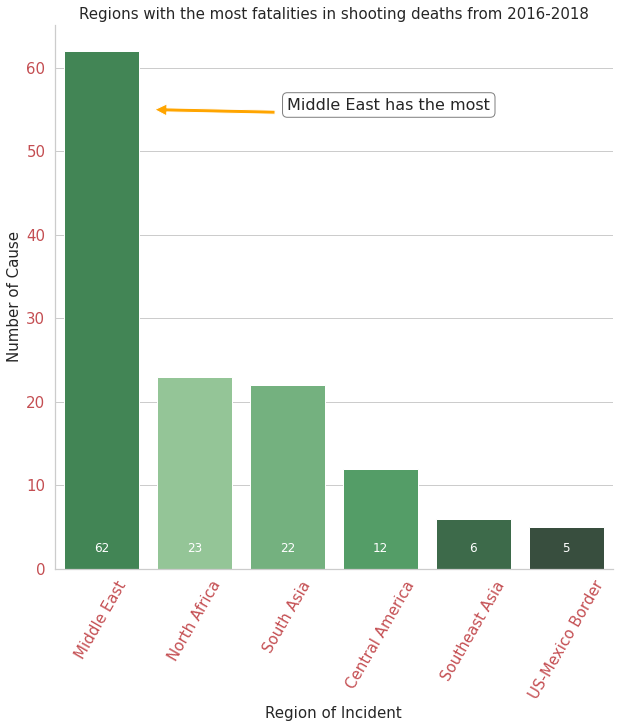

In [14]:
plt.figure(figsize=(10,10))
rank = jk1["Region"].argsort()
pal = sns.color_palette("Greens_d", len(jk1))
plt_=sns.barplot(x='Region',y='Cause',data=jk1, palette=np.array(pal)[rank])
#แสดงตัวเลขในกราฟ
for index, row in jk1.iterrows():
 plt.text(row.name,2, round(row.Cause,2), color='white', ha="center")
#องศาของชื่อแกน x
for tick in plt_.get_xticklabels():
 tick.set_rotation(60)
# ภูมิภาคที่มีสาเหตุการเสียชีวิตจากการโดนยิงตายมากที่สุด 6 อันดับแรกในช่วงปี 2559-2561
plt.title('Regions with the most fatalities in shooting deaths from 2016-2018', fontsize=15)
#ขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=15,labelcolor='r')
#กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.ylabel('Number of Cause',fontsize=15);
plt.xlabel('Region of Incident',fontsize=15);
# การปรับแต่งกรอบกราฟ
sns.despine( right=True, left=False, );
# Middle East(ตะวันออกกลางมีจำนวนสาเหตุจากการโดนยิงตายในระหว่างปี 2016 - 2018 มากที่สุด)
plt.annotate('Middle East has the most', xy=(0.5, 55),size=16, xytext=(2, 55),bbox=dict(boxstyle="round", fc="none", ec="gray"),arrowprops=dict(facecolor='orange', shrink=0.05),)
plt.show()

2.   จากสาเหตุการเสียชีวิตจากการจมน้ำ(Drowning) ที่มีมากสุดอันดับ 1 จากทั่วโลก  มีภูมิภาค(Region of Incident)ใดที่เกิดมากสุดอันดับ 1 



In [15]:
sf = data['Cause of Death'].value_counts().index.values
sf1=data[data['Cause of Death']==sf[0]]
sf2 = sf1['Region of Incident'].value_counts().reset_index()
sf2.columns = ['Region','Cause']
sf2

,Region,Cause
0,Mediterranean,595
1,US-Mexico Border,343
2,Europe,46
3,Horn of Africa,31
4,Southeast Asia,31
5,Caribbean,29
6,Central America,22
7,Sub-Saharan Africa,19
8,North Africa,16
9,Middle East,12


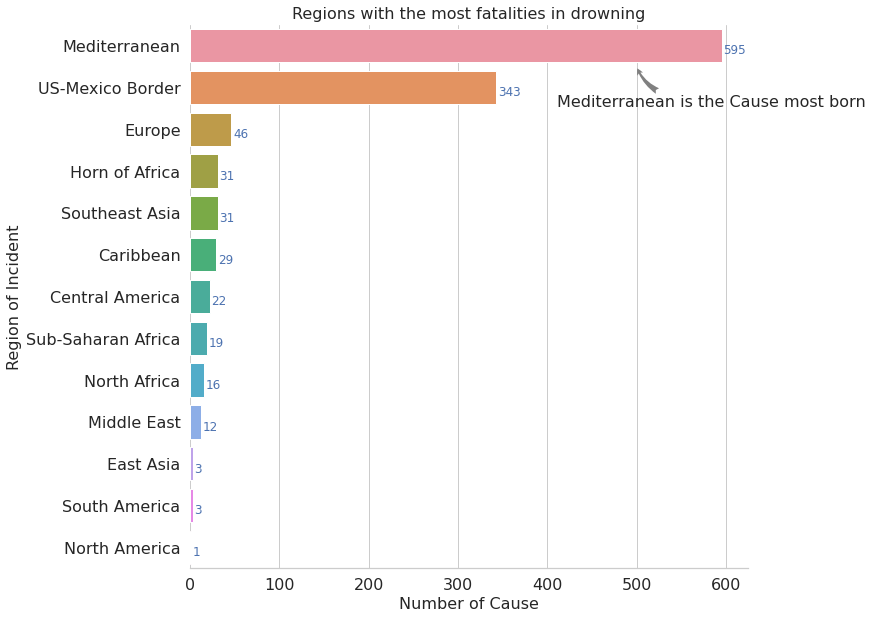

In [16]:
plt.figure(figsize=(10,10))
sa = sns.barplot(x="Cause", y="Region", data=sf2)
# ภูมิภาคที่มีผู้เสียชีวิตจากการจมน้ำมากที่สุด
plt.title('Regions with the most fatalities in drowning', fontsize=16)
#  กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=16)
#กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.ylabel('Region of Incident',fontsize=16);
plt.xlabel('Number of Cause',fontsize=16);
# การปรับแต่งกรอบกราฟ
sns.despine(left=True);
# แสดงจำนวนบนกราฟ
for i, v in sf2['Cause'].items():  
  sa.text(v+2,i+0.2, v, color='b',rotation=0)
# ทะเลเมดิเตอร์เรเนียนเกิดมากที่สุด
sa.annotate('Mediterranean is the Cause most born ',xy=(500, 0.5),size=16,xycoords='data',xytext=(-80, -40), textcoords='offset points', arrowprops=dict(arrowstyle="fancy",fc="0.5", ec="none",connectionstyle="angle3,angleA=1,angleB=-70"))
plt.show()# คำสั่งให้แสดง

3.  ในระหว่างปี2015-2019 มีจำนวนผู้หญิงที่เสียชีวิต(Cause of Death)จากการจมน้ำ(Drowning)และเสียชีวิตจากเจ็บป่วย(Sickness and lack of access to medicines)ในปีไหนมากที่สุด





In [17]:
sfds=data[(data['Cause of Death'] == 'Sickness and lack of access to medicines') | (data['Cause of Death'] == 'Drowning') | (data['Cause of Death'] == 'Drowning')]
sfds_=sfds.groupby(['Cause of Death','Reported Year'], sort=True)[['Number of Females']].sum().reset_index()
sfds_.columns = ['Cause of Death','Year','Females']
sfds_

,Cause of Death,Year,Females
0,Drowning,2014,42.0
1,Drowning,2015,156.0
2,Drowning,2016,123.0
3,Drowning,2017,244.0
4,Drowning,2018,138.0
5,Drowning,2019,83.0
6,Sickness and lack of access to medicines,2015,1.0
7,Sickness and lack of access to medicines,2016,26.0
8,Sickness and lack of access to medicines,2017,30.0
9,Sickness and lack of access to medicines,2018,67.0


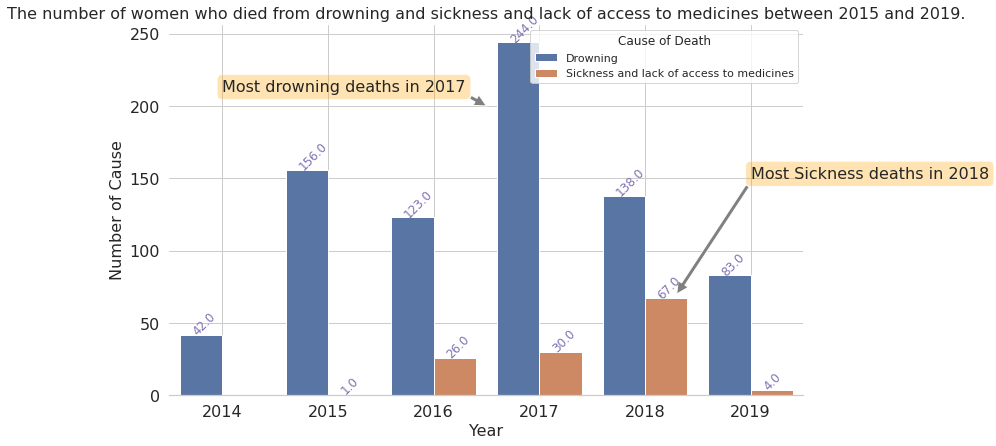

In [18]:
# print(sfds_["Females"].iteritems())
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(2, 2, 1)
sns.set(style="whitegrid")
ax1 = sns.barplot(x = 'Year',y = 'Females', hue = 'Cause of Death',data = sfds_)
# จำนวนผู้หญิงที่เสียชีวิตจากการจมน้ำและเจ็บป่วยและขาดการเข้าถึงยาระหว่างปี 2558-2562
plt.title('The number of women who died from drowning and sickness and lack of access to medicines between 2015 and 2019.', fontsize=16)
# กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=16)
#กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.ylabel('Number of Cause',fontsize=16);
plt.xlabel('Year',fontsize=16);
# ผู้เสียชีวิตจากการจมน้ำมากที่สุดในปี 2560
ax1.annotate('Most drowning deaths in 2017', xy=(2.5, 200),size=16,xytext=(0,210),bbox=dict(boxstyle="round", fc='orange', alpha=0.3),arrowprops=dict(facecolor='gray', shrink=2),)
# การเจ็บป่วยส่วนใหญ่เสียชีวิตในปี 2561
ax1.annotate('Most Sickness deaths in 2018', xy=(4.3, 70),size=16,xytext=(5,150),bbox=dict(boxstyle="round", fc='orange', alpha=0.3),arrowprops=dict(facecolor='gray', shrink=2),)
# แสดงจำนวนบนกราฟ
for i, v in enumerate(sfds_["Females"].items()):  
  if i<=5 :     
    ax1.text(i-0.3,v[1], "{:,}".format(v[1]), color='m', rotation=45)
  else:
    ax1.text(i-4.9 ,v[1], "{:,}".format(v[1]), color='m', rotation=45)
# การปรับแต่งกรอบกราฟ
ax1.grid(True)
sns.despine(left=True);
plt.show()# คำสั่งให้แสดง

4.จากข้อมูลในปี 2016 อยากทราบจำนวนคนตาย(Number Dead) จำนวนคนหาย(Minimum Estimated Number of Missing)ที่มีน้อยที่สุดในเดือนอะไร และจำนวนผู้รอดชีวิต (Number of Survivors)มากที่สุดในเดือนอะไร





*   จำนวนผู้รอดชีวิต(Number of Survivors)มากที่สุดในเดือนมิ.ย.(Jun)
*   จำนวนคนตาย(Number Dead)น้อยที่สุดในเดือนเม.ย.(Apr)
*   จำนวนคนหาย(Minimum Estimated Number of Missing)น้อยที่สุดในเดือนส.ค.(Aug)



In [19]:
sdsa=data[data['Reported Year']==2016]
jk1=sdsa.groupby(['Reported Month'], sort=False)[['Number of Survivors','Number Dead','Minimum Estimated Number of Missing']].sum().reset_index()
jk1.columns = ['Reported Month','Number of Survivors','Number Dead','Minimum Estimated Number of Missing']
jk1

,Reported Month,Number of Survivors,Number Dead,Minimum Estimated Number of Missing
0,Dec,1128.0,410.0,291.0
1,Nov,555.0,270.0,675.0
2,Oct,1036.0,571.0,179.0
3,Sep,3342.0,414.0,120.0
4,Aug,273.0,223.0,21.0
5,Jul,1554.0,393.0,66.0
6,Jun,3841.0,290.0,347.0
7,May,2314.0,189.0,1190.0
8,Apr,303.0,138.0,607.0
9,Mar,1210.0,367.0,208.0


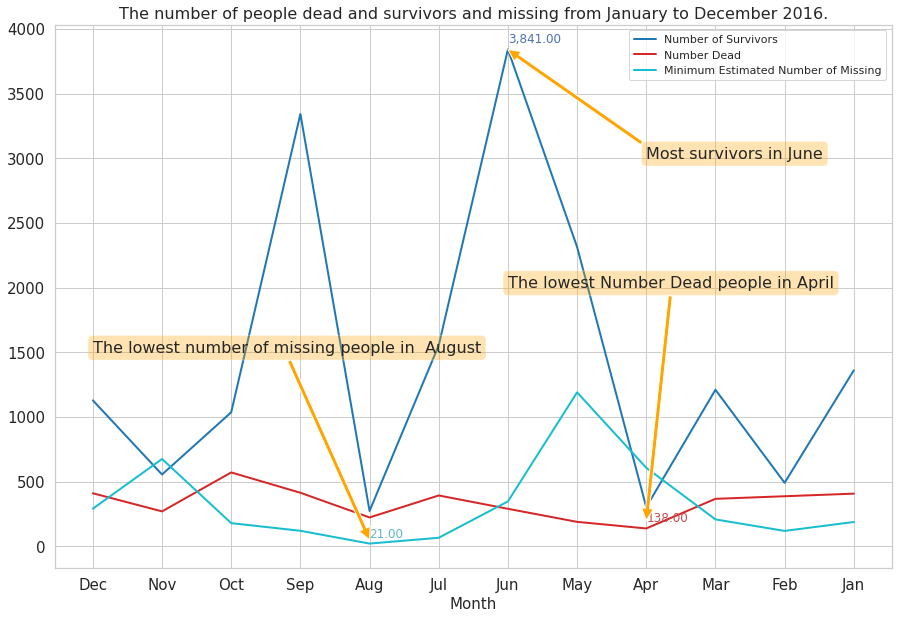

In [20]:
fig, ax2 = plt.subplots(figsize=(15,10))
ax2.plot(jk1['Reported Month'],jk1['Number of Survivors'],  label='Number of Survivors', color='tab:Blue',lw=2)
ax2.plot(jk1['Reported Month'],jk1['Number Dead'],  label='Number Dead', color='tab:red',lw=2)
ax2.plot(jk1['Reported Month'],jk1['Minimum Estimated Number of Missing'], label='Minimum Estimated Number of Missing', color='tab:cyan',lw=2)
# กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=15)
# จำนวนผู้เสียชีวิตและผู้รอดชีวิตและสูญหายตั้งแต่เดือนมกราคมถึงธันวาคม 2559
plt.title('The number of people dead and survivors and missing from January to December 2016.', fontsize=16)
# กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=15)
#กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.xlabel('Month', fontsize=15);
for i, v in enumerate(jk1['Number of Survivors'].items()): 
  if(max(jk1['Number of Survivors'])== v[1]): 
    ax2.text(i,v[1]+50,"{:,.2f}".format(v[1]), color='b', rotation=0)
for i, v in enumerate(jk1['Number Dead'].items()):  
  if(min(jk1['Number Dead'])== v[1]):
    ax2.text(i,v[1]+50,"{:,.2f}".format(v[1]), color='r', rotation=0)
for i, v in enumerate(jk1['Minimum Estimated Number of Missing'].items()):
  if(min(jk1['Minimum Estimated Number of Missing'])== v[1]):  
    ax2.text(i,v[1]+50,"{:,.2f}".format(v[1]), color='c', rotation=0)
# จำนวนผู้รอดชีวิต(Number of Survivors)มากที่สุดในเดือนมิ.ย.(Jun)
ax2.annotate('Most survivors in June', xy=(6, 3840),size=16,xytext=(8,3000),bbox=dict(boxstyle="round", fc='orange', alpha=0.3),arrowprops=dict(facecolor='orange', shrink=2),)
# จำนวนคนตาย(Number Dead)น้อยที่สุดในเดือนเม.ย.(Apr)
ax2.annotate('The lowest Number Dead people in April', xy=(8, 200),size=16,xytext=(6,2000),bbox=dict(boxstyle="round", fc='orange', alpha=0.3),arrowprops=dict(facecolor='orange', shrink=2),)
# จำนวนคนหาย(Minimum Estimated Number of Missing)น้อยที่สุดในเดือนส.ค.(Aug)
ax2.annotate('The lowest number of missing people in  August', xy=(4, 50),size=16,xytext=(0,1500),bbox=dict(boxstyle="round", fc='orange', alpha=0.3),arrowprops=dict(facecolor='orange', shrink=2),)
ax2.legend()
plt.show()




5. หน่วยงานที่รายงานอุบัติเหตุทางรถยนต์มากสุด 6 อันดับ



In [21]:
data['Information Source'] = data['Information Source'].str.lower()
ert=data[data['Cause of Death']=='Vehicle Accident']
ert1=ert.groupby(['Information Source'])[['Cause of Death']].count().sort_values(by = ['Cause of Death'],ascending = False).head(6).reset_index()
ert1.columns = ['Information','Cause']
ert1

,Information,Cause
0,mixed migration monitoring mechanism initiativ...,196
1,iom afghanistan,77
2,mhub,27
3,calais migrant solidarity,9
4,iom greece,5
5,webb county office of the medical examiner- dr...,3


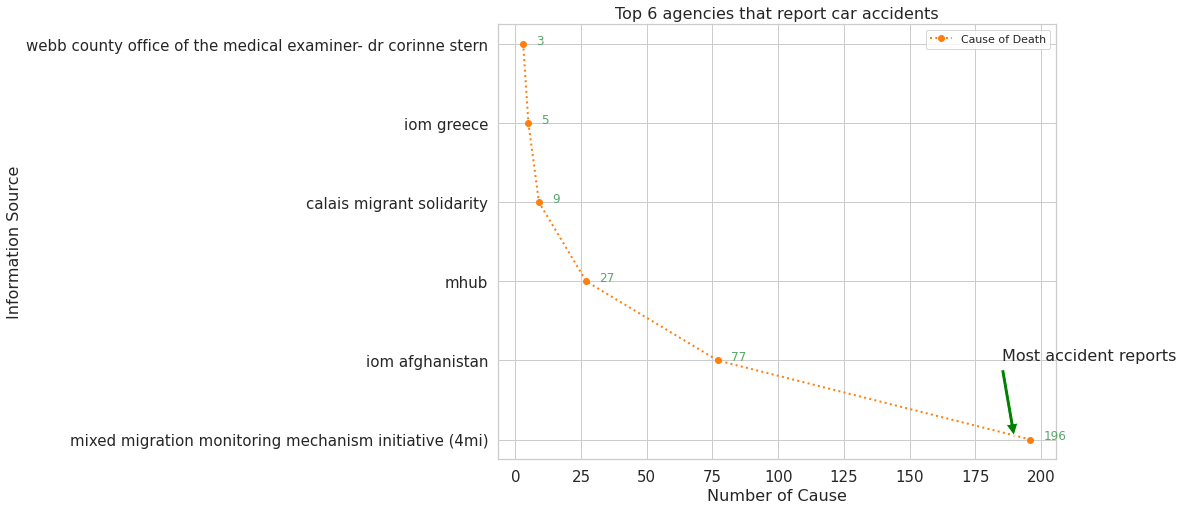

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ert1['Cause'],ert1['Information'], 'bo:', label='Cause of Death', color='tab:orange',lw=2)
# กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=15)
#กำหนดชื่อและขนาดตัวอักษรแกนxy
ax.set_ylabel('Information Source', fontsize=16) 
ax.set_xlabel('Number of Cause', fontsize=16)
# หน่วยงานที่รายงานอุบัติเหตุทางรถยนต์มากสุด 6 อันดับ
ax.set_title("Top 6 agencies that report car accidents", fontsize=16) 
# plt.xticks(rotation=65)
# รายงานอุบัติเหตุส่วนใหญ่
plt.annotate('Most accident reports', xy=(190, 0), xytext=(185, 1),size=16,arrowprops=dict(facecolor='green', shrink=0.05),)
# แสดงจำนวนบนกราฟ
for i, v in ert1['Cause'].items():  
  ax.text(v+5,i, v, color='g', rotation=0)
# ax.grid(True)
ax.legend()
plt.show()# คำสั่งให้แสดง

6. อยากทราบจำนวนผู้เสียชีวิตตามปี

In [23]:
fgh6 = data.groupby(data['Reported Year'])[['Number Dead']].sum().reset_index()
fgh6.columns = ['Year','Dead']
fgh6

,Year,Dead
0,2014,1724.0
1,2015,4045.0
2,2016,4059.0
3,2017,3734.0
4,2018,3032.0
5,2019,1895.0


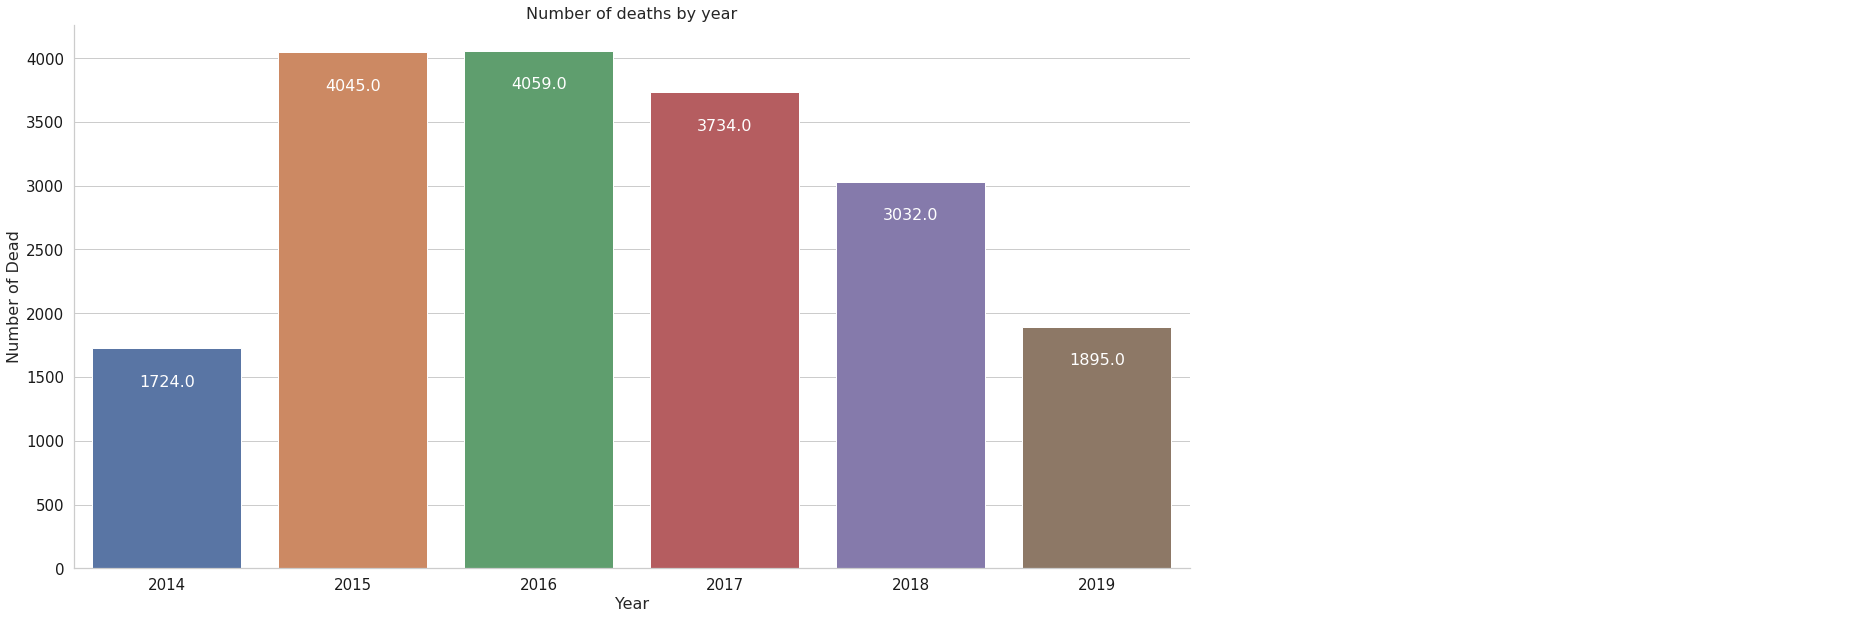

In [24]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("pastel")
plt_=sns.barplot(x='Year',y='Dead',data=fgh6)
for index, row in fgh6.iterrows():
 plt.text(row.name,row.Dead-300, round(row.Dead,2), color='white', ha="center",fontsize=16)
#จำนวนผู้เสียชีวิตในแต่ละปี
plt.title('Number of deaths by year', fontsize=16)
plt.tick_params(labelsize=15,labelcolor='k')
plt.ylabel('Number of Dead',fontsize=16);
plt.xlabel('Year',fontsize=16);
# การปรับแต่งกรอบกราฟ
sns.despine( right=True, left=False, );
# ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด
plt.annotate('Burundi countries with the lowest underweight.', xy=(9,32),size=16, xytext=(7, 37),bbox=dict(boxstyle="round", fc="orange", ec="gray"),arrowprops=dict(facecolor='orange', shrink=0.05),)
plt.show()

7. จากปีที่มีจำนวนผู้เสียชีวิตมากที่สุดจากข้อ 6 อยากทราบความสัมพันธ์และแนวโน้วของช่วง เดือน กับประเทศว่ามีแนวโน้มอย่างไร 

In [25]:
sdsw=data[data['Reported Year']==2016]
sdf2=sdsw.groupby(['Reported Month','Region of Incident'], sort=False)[['Number Dead']].sum().reset_index()
sdf2.columns = ['Month','Region','Dead']
# sdf3['m'] = sdf3.Month.replace(m)
# sdf4 = sdf3.sort_values(by ='m',ascending = True )
sdf2

,Month,Region,Dead
0,Dec,US-Mexico Border,53.0
1,Dec,Mediterranean,119.0
2,Dec,North Africa,119.0
3,Dec,Southeast Asia,46.0
4,Dec,Europe,8.0
...,...,...,...
114,Jan,Europe,6.0
115,Jan,Caribbean,1.0
116,Jan,Sub-Saharan Africa,18.0
117,Jan,Horn of Africa,9.0


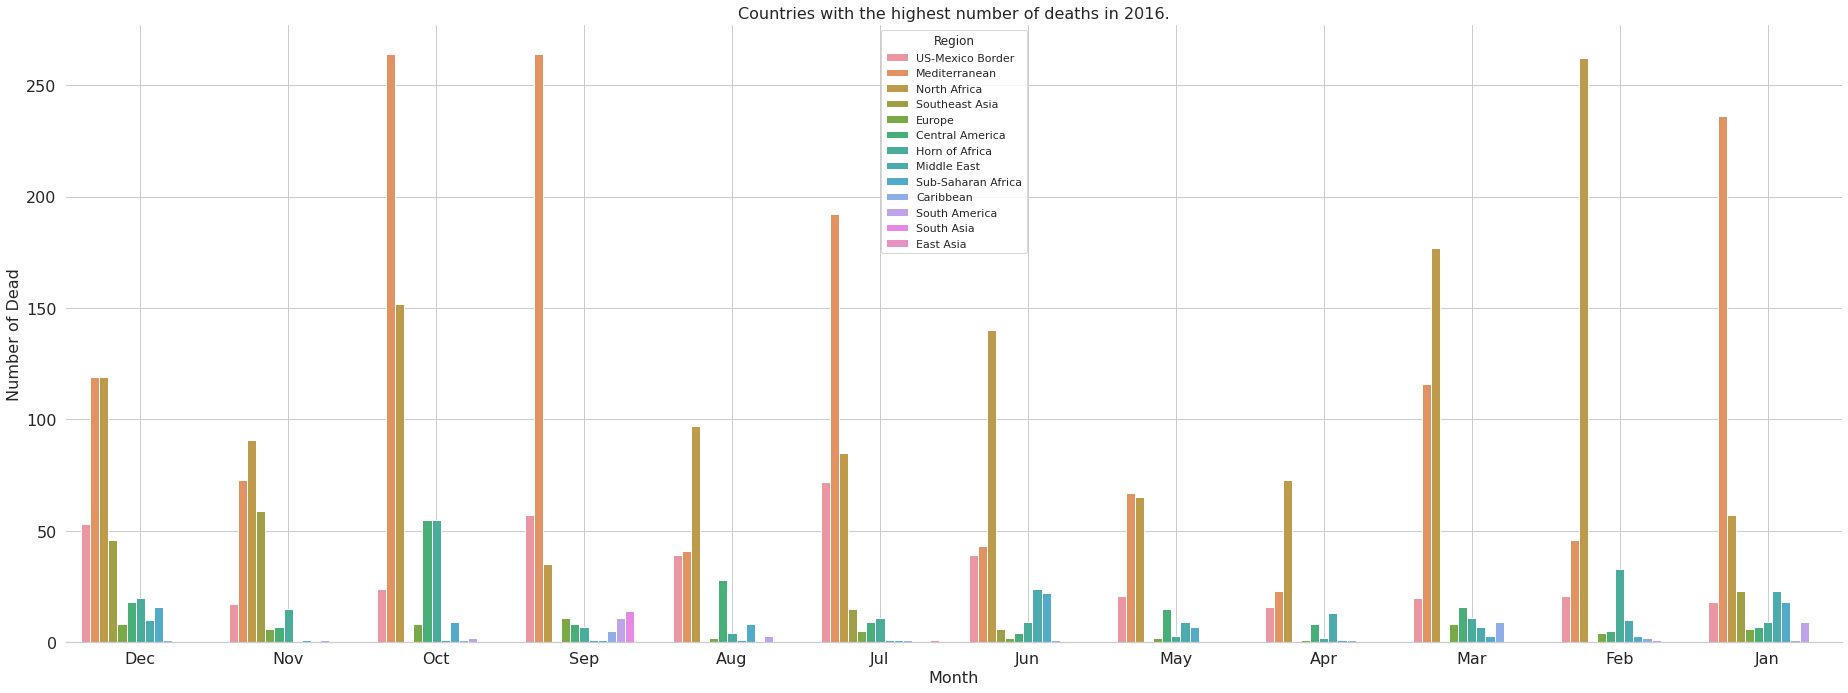

In [26]:

fig = plt.figure(figsize=(70, 25))
ax1 = fig.add_subplot(2, 2, 1)
sns.set(style="whitegrid")
ax1 = sns.barplot(x = 'Month',y = 'Dead', hue = 'Region',data = sdf2)
# ประเทศที่มีผู้เสียชีวิตสูงสุดในปี 2559
plt.title('Countries with the highest number of deaths in 2016.', fontsize=16)
plt.tick_params(labelsize=16)
plt.ylabel('Number of Dead',fontsize=16);
plt.xlabel('Month',fontsize=16);
ax1.grid(True)
sns.despine(left=True);
plt.show()

8. ภูมิภาคที่มีการย้ายถิ่นฐานมากที่สุด

In [28]:
zcs = data.groupby(['Region of Incident'])[['Migration Route']].count().reset_index()
zcs.columns = ['Region',"Route"]
zcs

,Region,Route
0,Caribbean,68
1,Central America,364
2,Central Asia,1
3,East Asia,6
4,Europe,301
5,Horn of Africa,238
6,Mediterranean,1085
7,Middle East,182
8,North Africa,1262
9,North America,2


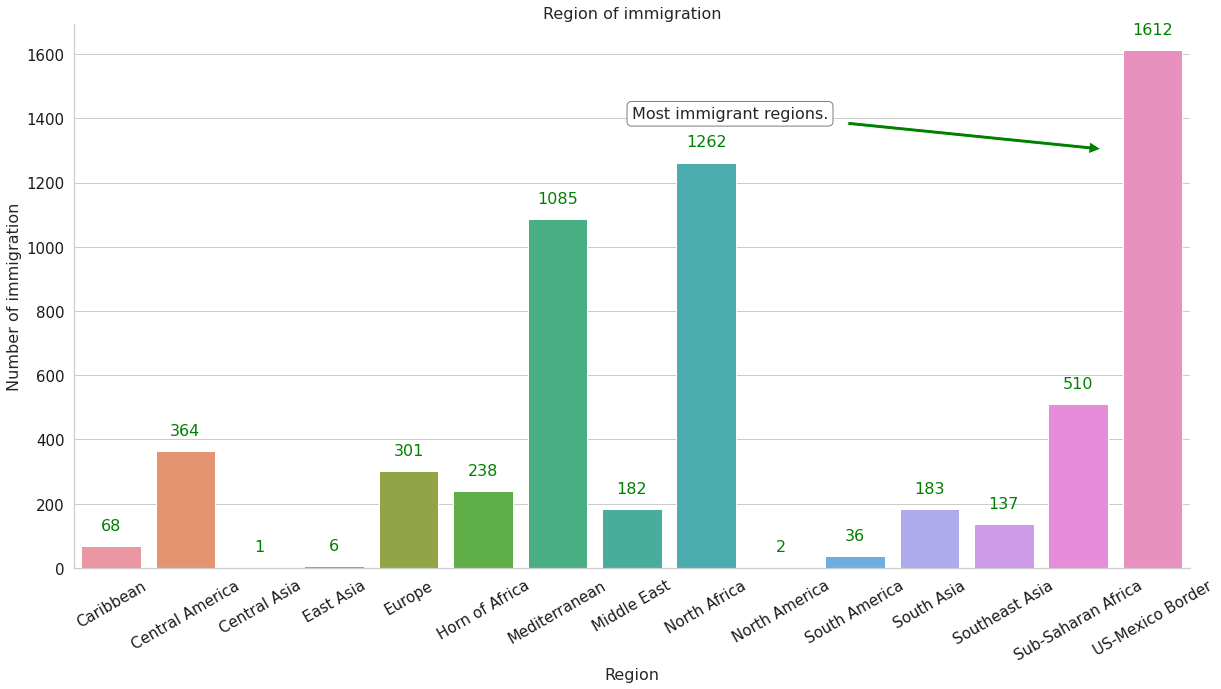

In [29]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("husl")
plt_=sns.barplot(x='Region',y='Route',data=zcs)
for index, row in zcs.iterrows():
 plt.text(row.name,row.Route+50, round(row.Route,20), color='green', ha="center",fontsize=16)
for tick in plt_.get_xticklabels():
 tick.set_rotation(30)
plt.title('Region of immigration', fontsize=16)
plt.tick_params(labelsize=15,labelcolor='k')
plt.ylabel('Number of immigration',fontsize=16);
plt.xlabel('Region',fontsize=16);
sns.despine( right=True, left=False, );
plt.annotate('Most immigrant regions.', xy=(13.5,1300),size=16, xytext=(7, 1400),bbox=dict(boxstyle="round", fc="white", ec="gray"),arrowprops=dict(facecolor='green', shrink=0.05),)
plt.show()

9. จำนวนคนรอดชีวิตจากอบัติเหตุทางรถยนต์


**ข้อ 9**  จากกราฟจำนวนผู้รอดชีวิตจากอุบัติเหตุทางรถยนต์ จะเห็นได้ว่าโซนEurope มีจำนวนผู้เสียชีวิตมากที่สุด 18 คน ลองลงมาเป็นโซน us-Mexico Border มี 12 คน 


In [30]:
vfd1=data[(data['Cause of Death'] == 'Hit by vehicle')]
vfd = vfd1.groupby(['Region of Incident'])[['Number of Survivors']].count().reset_index()
vfd.columns = ['Region',"Survivors"]
vfd

,Region,Survivors
0,Central America,6
1,Europe,18
2,Middle East,1
3,North Africa,1
4,US-Mexico Border,12


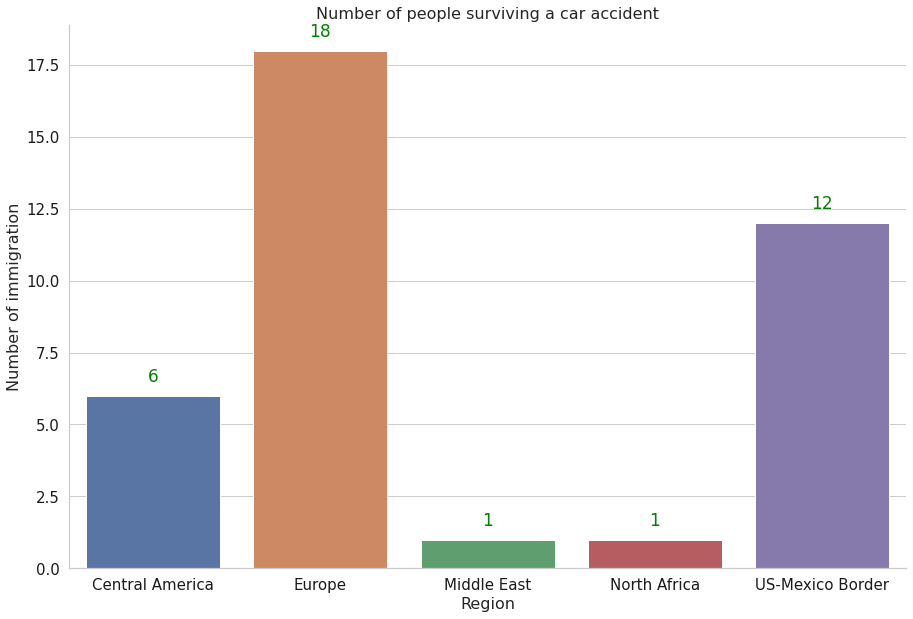

In [31]:

plt.figure(figsize=(15,10))
pal = sns.color_palette("husl")
plt_=sns.barplot(x='Region',y='Survivors',data=vfd)
for index, row in vfd.iterrows():
 plt.text(row.name,row.Survivors+0.5, round(row.Survivors,2), color='green', ha="center",fontsize=17)
plt.title('Number of people surviving a car accident', fontsize=16)
plt.tick_params(labelsize=15,labelcolor='k')
plt.ylabel('Number of immigration',fontsize=16);
plt.xlabel('Region',fontsize=16);
sns.despine( right=True, left=False, );
plt.show()


10. อยากทราบการเปรียบเทียบว่าเส้นทางในการย้ายถิ่น(Migration Rout)มีความสัมพันธ์กับจำนวนผู้เสียชีวิตหรือไม่

In [33]:
vfd1=data[(data['Migration Route'] != '')]
vfd = vfd1.groupby(['Region of Incident'])[['Number of Children','Number of Males','Number of Females']].sum().reset_index()
vfd.columns = ['Region','Children','Males','Females']
vfd

,Region,Children,Males,Females
0,Caribbean,8.0,111.0,45.0
1,Central America,57.0,369.0,56.0
2,Central Asia,0.0,0.0,0.0
3,East Asia,0.0,6.0,1.0
4,Europe,48.0,366.0,51.0
5,Horn of Africa,44.0,236.0,71.0
6,Mediterranean,712.0,2029.0,899.0
7,Middle East,82.0,183.0,76.0
8,North Africa,154.0,624.0,279.0
9,North America,0.0,1.0,1.0


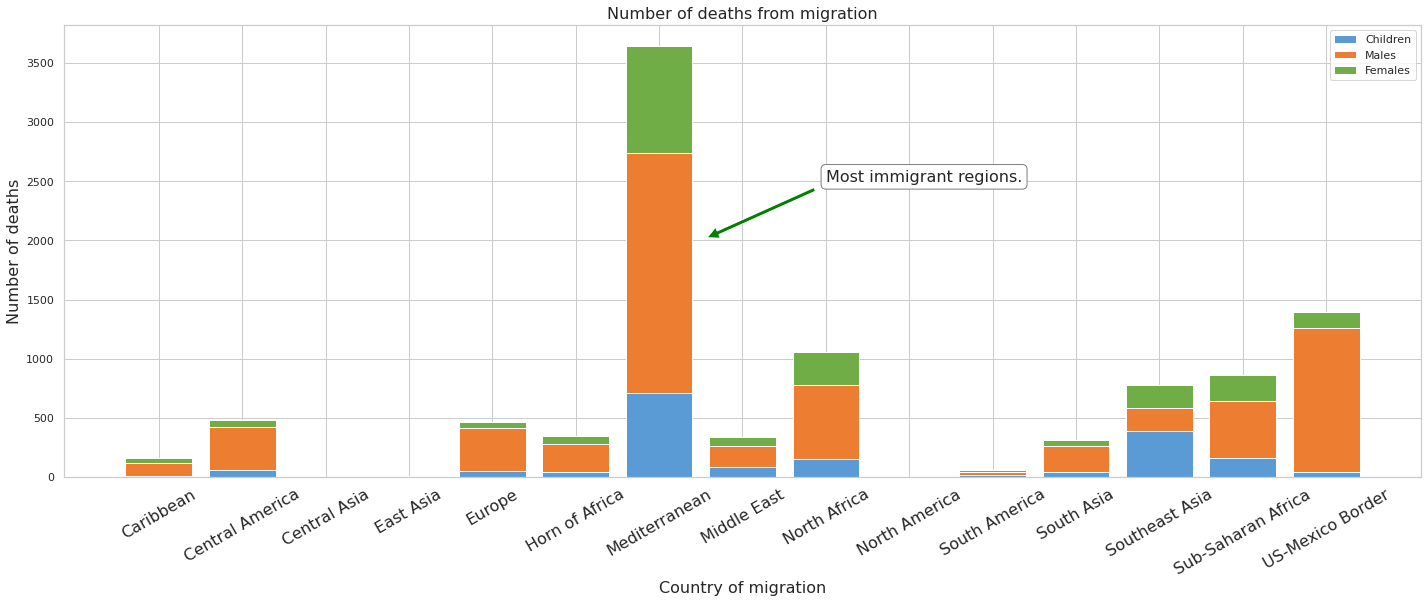

In [34]:
x = vfd['Region']
y1 = vfd['Children']
y2 = vfd['Males']
y3 = vfd['Females']
x_ticklabels = vfd['Region']
y_colors = ['#5B9BD5', '#ED7D31', '#70AD47']
y_labels = ['Children','Males','Females']
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.bar(x, y1, color=y_colors[0], tick_label=x_ticklabels, label=y_labels[0])
plt.bar(x, y2, bottom=y1, color=y_colors[1], label=y_labels[1])
plt.bar(x, y3, bottom=y1+y2, color=y_colors[2], label=y_labels[2])
plt.xlabel('Country of migration',fontsize=16)
plt.ylabel('Number of deaths',fontsize=16)
plt.xticks(rotation=30,fontsize=16)
plt.title('Number of deaths from migration',fontsize=16)
plt.annotate('Most immigrant regions.', xy=(6.5,2000),size=16, xytext=(8, 2500),bbox=dict(boxstyle="round", fc="white", ec="gray"),arrowprops=dict(facecolor='green', shrink=0.05),)
plt.legend()
plt.tight_layout()
plt.show()

11. 
อยากทราบจำนวนผู้เสียชีวิตจากการเกิดอุบัติเหตุทางรถไฟเรียงตามเดือน

In [35]:
vfd1=data[(data['Cause of Death'].str.find('train')>=0)]
vfd = vfd1.groupby(['Reported Month'])[['Number Dead']].sum().reset_index()

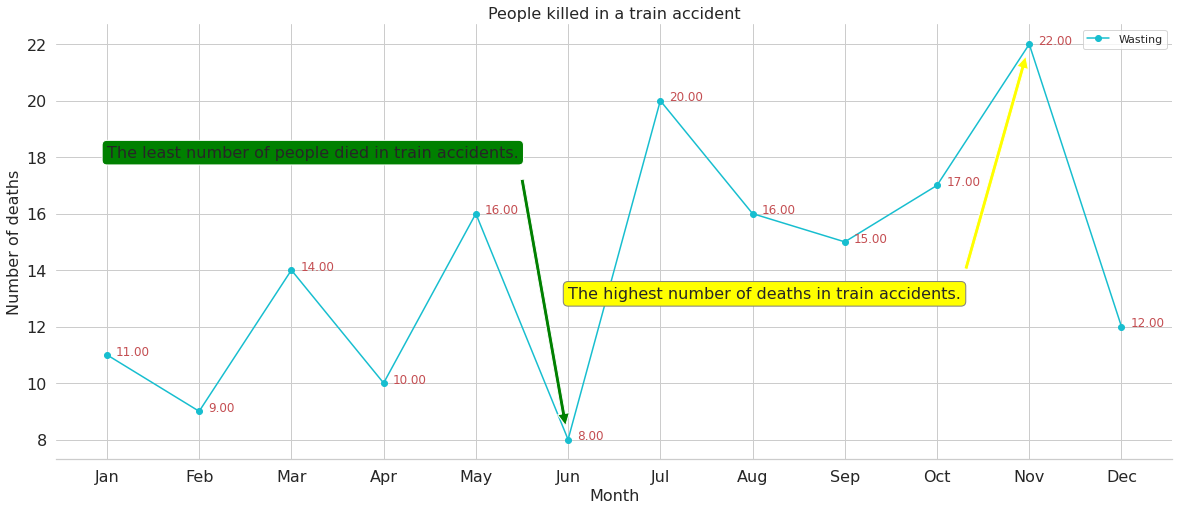

In [36]:
vfd.columns = ['Month','Dead']
vfd['m'] = vfd.Month.replace(m)
fsdh = vfd.sort_values(by ='m',ascending = True )
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
x = fsdh['Month'] # create data
ax.plot(x,fsdh['Dead'], 'bo-',  label='Wasting', color='tab:cyan')
plt.tick_params(labelsize=16)
ax.set_xlabel('Month', fontsize=16) 
ax.set_ylabel('Number of deaths', fontsize=16)
ax.set_title("People killed in a train accident",fontsize=16)
for i, v in enumerate(fsdh['Dead'].items()):  
  ax.text(i+0.1,v[1], "{:.2f}".format(v[1]), color='r', rotation=0)
sns.despine(left=True);
plt.annotate('The least number of people died in train accidents.',xy=(5,8), xytext=(0,18),size=16,bbox=dict(boxstyle="round", fc="green", ec="white"),arrowprops=dict(facecolor='green', shrink=0.05),)
plt.annotate('The highest number of deaths in train accidents.',xy=(10,22), xytext=(5,13),size=16,bbox=dict(boxstyle="round", fc="yellow", ec="gray"),arrowprops=dict(facecolor='yellow', shrink=0.05),)
ax.legend()
plt.show()